# Amsterdam Airbnb Open Data Project

Prepared by: Shady Reda

### 1.Context:
Airbnb has revolutionized the way people travel by offering a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of (Amsterdam, North Holland, The Netherlands)

### 2.Content:
The following Airbnb activity is included dataset Summary information and metrics for listings in Amsterdam

By exploring this dataset, I'll be looking for answers for the below 3 questions:

1- Does the room type affect the pricing?

2- Who the neighborhood impacts the price of the listing?

3- What factors impact clients reviews?

In [3]:
# Let's start by importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read listing data frame
df=pd.read_csv(r"C:\Users\SReda\Downloads\listings(Amsterdam, North Holland, The Netherlands).csv")# please add our own path of data set

In [6]:
# Display columns in or data frame for exploratory analysis
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [7]:
# Display columns null values
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3790
minimum_nights                       0
number_of_reviews                    0
last_review                       1027
reviews_per_month                 1027
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64

In [8]:
# Adding the price null data in a sepreate data frame

df_price_empty = df[df['price'].isnull()]

In [9]:
# Adding the license null data in a sepreate data frame

license_empty =df[df['license'].isnull()]

In [10]:
# Foucs on a spcicfice colooumns and remove the rest 

df = df.drop(columns=['neighbourhood_group','latitude','longitude','last_review','name','license'])

In [11]:
# start to clean the dat removeing the null value in price columns

df_cleaned = df.dropna(subset=['price'])

In [13]:
# fill null values with zero

df_cleaned.loc[:, ['reviews_per_month', 'price']] = df_cleaned[['reviews_per_month', 'price']].fillna(0)

In [14]:
# Sort the cleaned data

df_cleaned = df_cleaned.sort_values(by='price', ascending=False)

In [15]:
# adding new column to calculate the price per night

df_cleaned['price_per_night'] = df_cleaned['price'] / df_cleaned['minimum_nights']

In [16]:
# group the data for better analysis

grouped_neighbourhood = df_cleaned.groupby('neighbourhood').agg(
    {
        'price_per_night': 'mean',  # Average price per night
        'number_of_reviews': 'sum',  # Total number of reviews
        'price': 'mean',  # Average price
        'minimum_nights': 'max',  # Maximum of minimum nights
        'availability_365': 'max',
    }).reset_index()

In [17]:
# Sort the grouped_neighbourhood data by price_per_night for better visulaization

grouped_neighbourhood  = grouped_neighbourhood .sort_values(by='price_per_night', ascending=False)

In [82]:
grouped_room_type = df_cleaned.groupby('room_type').agg(
    price_per_night=('price_per_night', 'mean'),
    availability_365=('minimum_nights', 'max'),
    neighbourhood=('neighbourhood', 'first')  # or another appropriate aggregation
).reset_index()

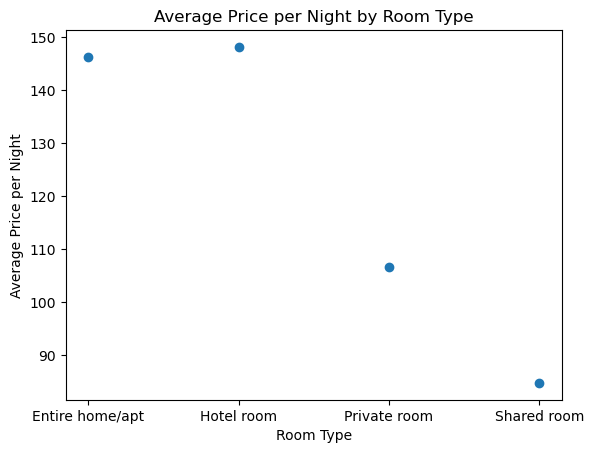

In [19]:
# Group and calculate average price for each room type
grouped_room_type = df_cleaned.groupby('room_type')['price_per_night'].mean().reset_index()

plt.scatter(grouped_room_type['room_type'], grouped_room_type['price_per_night'])

plt.xlabel('Room Type')
plt.ylabel('Average Price per Night')
plt.title('Average Price per Night by Room Type')

plt.grid(False)  # You can enable grid if needed
plt.show()

As shown the Hotel room is the highest in the pricing list and the room types has a great impact on the pricing

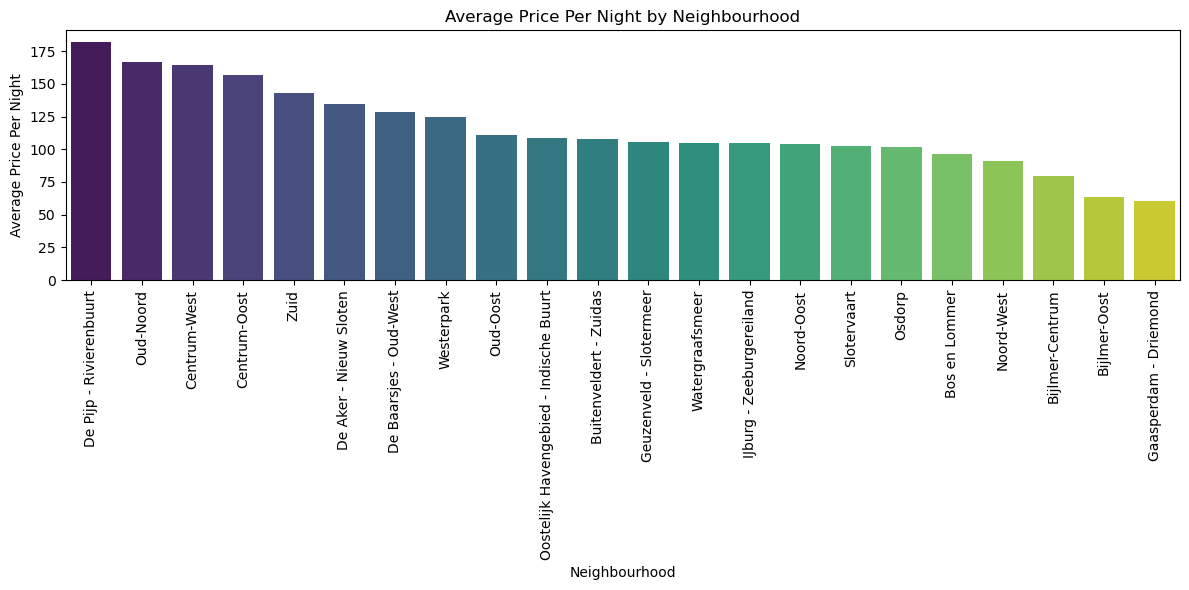

In [112]:
# Bar chart for price_per_night using grouped_neighbourhood

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_neighbourhood, x='neighbourhood', y='price_per_night', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price Per Night')
plt.title('Average Price Per Night by Neighbourhood')
plt.tight_layout()
plt.show()

In [114]:
# Sort the grouped_neighbourhood data by number_of_reviews for better visulaization

grouped_neighbourhood  = grouped_neighbourhood .sort_values(by='number_of_reviews', ascending=False)

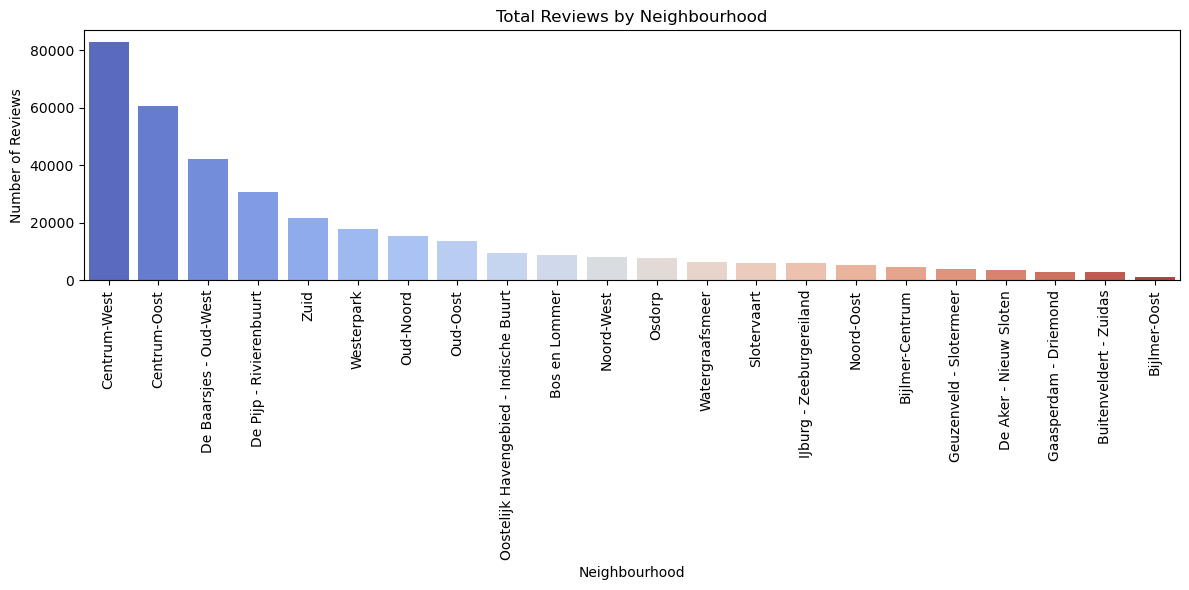

In [115]:
# Bar chart for number_of_reviews using grouped_neighbourhood
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_neighbourhood, x='neighbourhood', y='number_of_reviews', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.title('Total Reviews by Neighbourhood')
plt.tight_layout()
plt.show()

The graph indeact that the niebourhood has an effect to the client reviews

In [ ]:
license_empty.to_csv(output_path) #Optional

In [ ]:
df_price_empty.to_csv(output_path) #Optional

### 3.Conclusion:

Notes of our data analysis:

1- During data wrangling, we found that 97 listings lack a valid license. This issue must be addressed
promptly to avoid potential legal issues
& list of these listings can be extracted as CSV file if needed.

2- A list of 3790 listings was found without any pricing information
This significantly impacts data integrity and credibility for clients, as pricing is considered critical data. 
This list can be extracted as a CSV file.

#### To recap, we had three key questions we aimed to answer using our data:

1-Does the room type affect the pricing?

Our analysis shows that hotel listings tend to have the highest rate per night compared to other room types, indicating that room type does impact pricing.

2-How does the neighborhood impact the price of a listing?

In our analysis, we found that the highest-priced neighborhood is De Pijp - Rivierenbuurt, rather than the most reviewed neighborhood. Based on this insight, we recommend revisiting the pricing strategy for listings in this neighborhood to better align with the market.

3-What factors impact client reviews?

Our analysis revealed that two main factors influence the number of reviews and overall traffic in a neighborhood: location and pricing. Listings with competitive pricing and a location near popular areas (such as Centrum-West) tend to attract higher traffic and generate more positive reviews.

By this, we have come to the end of our analysis.
### Thank you